In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Lecture 27 ##

In [2]:
births = Table.read_table('baby.csv')

In [3]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [4]:
ages = births.column('Maternal Age')
ages_standard_units = standard_units(ages)

In [5]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

In [6]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


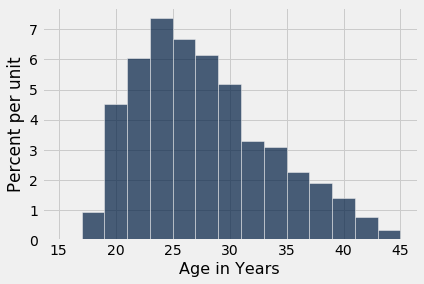

In [7]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

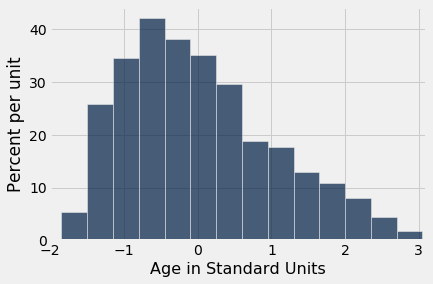

In [8]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Distributions ##

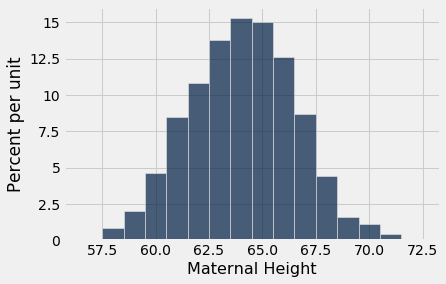

In [9]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [10]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

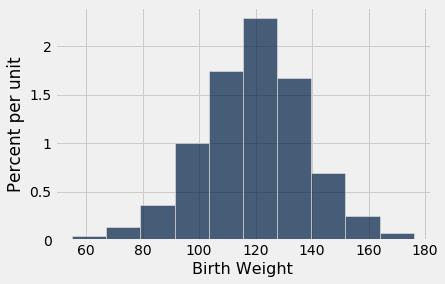

In [11]:
births.hist('Birth Weight')

In [12]:
b_weights = births.column('Birth Weight')
np.mean(b_weights), np.std(b_weights)

(119.46252129471891, 18.32086370220278)

## Central Limit Theorem ##

In [13]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


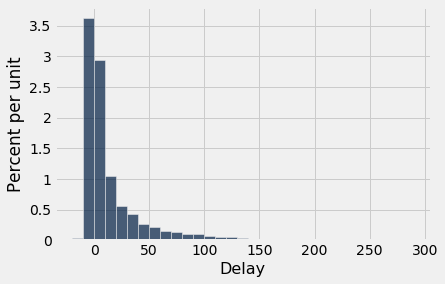

In [14]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [15]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [16]:
# median delay

percentile(50, delays)

2

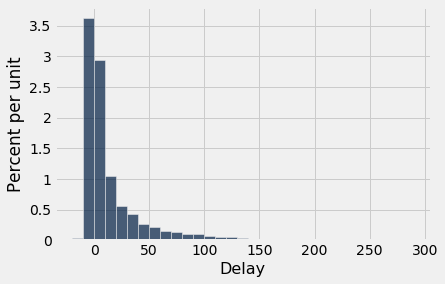

In [17]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [18]:
mean_delay

16.658155515370705

In [19]:
# One random sample mean

def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [25]:
one_sample_mean(900)

16.784444444444443

In [26]:
# Array of 10,000 sample means

def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [27]:
means_400 = ten_thousand_sample_means(400)

In [28]:
means_400

array([16.22  , 15.755 , 15.8275, ..., 17.3925, 14.82  , 18.245 ])

In [29]:
len(means_400)

10000

Population Average:  16.658155515370705


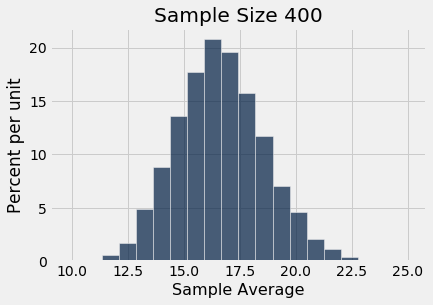

In [30]:
Table().with_column('Sample Mean', means_400).hist(bins = 20)

plots.title('Sample Size 400')
plots.xlabel('Sample Average')
print('Population Average: ', mean_delay);

In [31]:
np.average(means_400)

16.6433845

## Variability of the Sample Average ##

In [32]:
means_900 = ten_thousand_sample_means(900)

In [33]:
means_tbl = Table().with_column(
    '400', means_400,
    '900', means_900
)

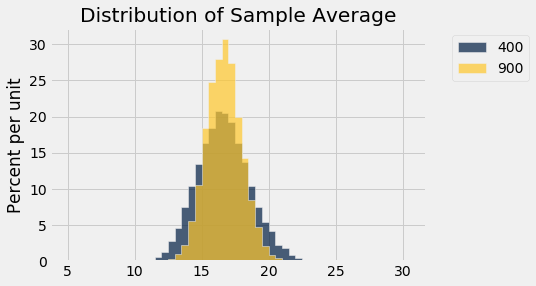

In [34]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [35]:
# Number of sequences of 400 delays picked at random

united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

In [37]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.64169
Population SD: 39.480199851609314
SD of sample means: 3.958955473846605


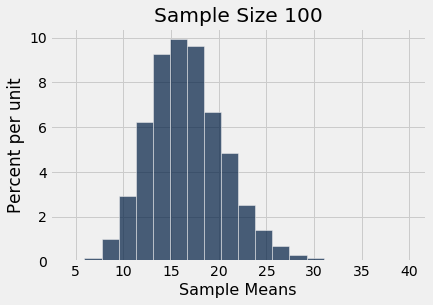

In [38]:
plot_sample_means(100)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.637046750000003
Population SD: 39.480199851609314
SD of sample means: 1.958488120704192


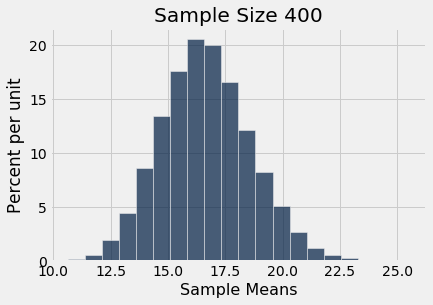

In [39]:
plot_sample_means(400)

In [ ]:
plot_sample_means(625)

In [ ]:
sd_delay / (625 ** 0.5)